<h1 align="center">Toán ứng dụng và thống kê</h1>
<h2 align="center">Đồ án Data Fitting</h2>

# 1. Thông tin sinh viên

- Họ và tên: Nguyễn Gia Huy
- MSSV: 22127154
- Lớp: 22CLC06


# 2. Giới thiệu đồ án và ý tưởng thực hiện

## 2.1. Giới thiệu đồ án

Đồ án này nhằm xây dựng mô hình dự đoán chất lượng rượu vang dựa trên cơ sở dữ liệu gồm 1200 mẫu rượu vang với 11 đặc trưng khác nhau. Chúng ta sẽ sử dụng phương pháp hồi quy tuyến tính để xây dựng mô hình dự đoán chất lượng rượu vang.

Yêu cầu của đồ án:
a. Xây dựng mô hình hồi quy tuyến tính sử dụng toàn bộ 11 đặc trưng.
b. Xây dựng mô hình hồi quy tuyến tính sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.
c. Xây dựng một mô hình của riêng để cho kết quả tốt nhất.

## 2.2 Ý tưởng thực hiện

- Đọc dữ liệu từ file csv.
- Tiền xử lý dữ liệu: kiểm tra dữ liệu thiếu, chuẩn hóa dữ liệu.
- Chia dữ liệu thành tập huấn luyện và tập kiểm tra.

### 2.2.1 Xây dựng mô hình hồi quy tuyến tính sử dụng toàn bộ 11 đặc trưng

Đối với yêu cầu này, chúng ta sẽ sử dụng toàn bộ 11 đặc trưng để xây dựng mô hình hồi quy tuyến tính. Để đánh giá mô hình, chúng ta sẽ sử dụng độ đo bình phương trung bình của sai số (Mean Squared Error - MSE).

Chúng ta sẽ xây dựng model tuyến tính có dạng:
$$ y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $$

Trong đó:

- $y$ là chất lượng rượu vang.
- $x_1, x_2, ..., x_n$ là các đặc trưng của rượu vang.
- $w_0, w_1, w_2, ..., w_n$ là các hệ số cần tìm. (Trong đó $w_0$ là hệ số chặn).

### 2.2.2 Xây dựng mô hình hồi quy tuyến tính sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất

Đối với yêu cầu này, chúng ta sẽ sử dụng duy nhất 1 đặc trưng để xây dựng mô hình hồi quy tuyến tính. Để đánh giá mô hình, chúng ta sẽ sử dụng độ đo bình phương trung bình của sai số (Mean Squared Error - MSE).

Chúng ta sẽ xây dựng model tuyến tính có dạng:
$$ y = w_0 + w_1x_1 $$

Trong đó:

- $y$ là chất lượng rượu vang.
- $x_1$ là đặc trưng của rượu vang.
- $w_0, w_1$ là các hệ số cần tìm. (Trong đó $w_0$ là hệ số chặn).

Chúng ta sẽ thử nghiệm với từng đặc trưng để chọn ra đặc trưng tốt nhất cho mô hình.

### 2.2.3 Xây dựng một mô hình của riêng để cho kết quả tốt nhất

Đối với yêu cầu này, chúng ta sẽ sử dụng một mô hình riêng để cho kết quả tốt nhất. Để đánh giá mô hình, chúng ta sẽ sử dụng độ đo bình phương trung bình của sai số (Mean Squared Error - MSE).

Chúng ta có thể xây dựng một số mô hình khác nhau như:

- Mô hình hồi quy tuyến tính bậc 1: $y = w_0 + w_1x_1$
- Mô hình hồi quy tuyến tính bậc 2: $y = w_0 + w_1x_1 + w_2x_1^2$
- Mô hình hồi quy tuyến tính bậc 3: $y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1^3$
- Mô hình tuyến tính - log: $y = w_0 + w_1\ln(x_1)$
- Mô hình log - tuyến tính: $\ln(y) = w_0 + w_1x_1$
- Mô hình log - log: $\ln(y) = w_0 + w_1\ln(x_1)$


# 3. Cài đặt

## 3.1. Import thư viện


In [26]:
import pandas as pd  # type: ignore - Thư viện dùng để xử lý dữ liệu dạng bảng (dataframe)
import numpy as np  # type: ignore - Thư viện dùng để xử lý dữ liệu dạng ma trận và các phép toán liên quan
import matplotlib.pyplot as plt  # type: ignore - Thư viện dùng để vẽ biểu đồ
from typing import List, Tuple  # type: ignore - Thư viện hỗ trợ kiểu dữ liệu
from numpy.typing import ArrayLike
import math  # type: ignore - Thư viện hỗ trợ các phép toán toán học


class Matrix:
    def __init__(self, data: list[list]) -> None:
        self.data = data
        self.rows = len(data)
        self.columns = len(data[0])

    def __str__(self) -> str:
        result = ""
        for i in range(self.rows):
            for j in range(self.columns):
                self.data[i][j] = round(self.data[i][j], 10)
            result += str(self.data[i]) + "\n"
        return result

    def __repr__(self) -> str:
        return f"Matrix({self.data})"

    def __getitem__(self, index: int) -> list:
        return self.data[index]

    def __setitem__(self, index: int, value: list):
        self.data[index] = value

    def __add__(self, other) -> "Matrix":
        if self.rows != other.rows or self.columns != other.columns:
            raise ValueError("Matrices must have the same dimensions")
        new_data = []
        for i in range(self.rows):
            new_data.append(
                [self.data[i][j] + other.data[i][j] for j in range(self.columns)]
            )
        return Matrix(new_data)

    def __sub__(self, other) -> "Matrix":
        if self.rows != other.rows or self.columns != other.columns:
            raise ValueError("Matrices must have the same dimensions")
        new_data = []
        for i in range(self.rows):
            new_data.append(
                [self.data[i][j] - other.data[i][j] for j in range(self.columns)]
            )
        return Matrix(new_data)

    def __mul__(self, other: "Matrix") -> "Matrix":
        new_data = []
        if type(other) == Matrix:
            if self.columns != other.rows:
                raise ValueError(
                    "The number of columns in the first matrix must be equal to the number of rows in the second matrix"
                )
            for i in range(self.rows):
                new_data.append(
                    [
                        sum(
                            [
                                self.data[i][k] * other.data[k][j]
                                for k in range(self.columns)
                            ]
                        )
                        for j in range(other.columns)
                    ]
                )
        elif type(other) == int or type(other) == float:
            new_data = [[x * other for x in row] for row in self.data]
        return Matrix(new_data)

    def getColumn(self: "Matrix", index: int) -> list:
        return [self.data[i][index] for i in range(self.rows)]

    def getRow(self: "Matrix", index: int) -> list:
        return self.data[index]

    def transpose(self) -> "Matrix":
        new_data = []
        for j in range(self.columns):
            new_data.append([self.data[i][j] for i in range(self.rows)])
        return Matrix(new_data)

    def getMinor(self: "Matrix", i: int, j: int) -> "Matrix":
        new_data = [
            [self.data[x][y] for y in range(self.columns) if y != j]
            for x in range(self.rows)
            if x != i
        ]
        return Matrix(new_data)

    def getCofactor(self: "Matrix", i: int, j: int) -> float:
        return self.getMinor(i, j).getDeterminant() * (-1) ** (i + j)

    def getDeterminant(self: "Matrix") -> float:
        if self.rows != self.columns:
            raise ValueError("The matrix must be square")
        if self.rows == 1:
            return self.data[0][0]
        if self.rows == 2:
            return self.data[0][0] * self.data[1][1] - self.data[0][1] * self.data[1][0]
        determinant = 0
        for i in range(self.rows):
            determinant += (
                self.data[0][i] * self.getMinor(0, i).getDeterminant() * (-1) ** i
            )
            print("Determinant: ", determinant)
        return determinant

    def getInverse(self: "Matrix") -> "Matrix":
        determinant = self.getDeterminant()
        print("Determinant: ", determinant)
        if determinant == 0:
            print("The matrix is not invertible")
        new_data = [
            [self.getCofactor(i, j) / determinant for j in range(self.columns)]
            for i in range(self.rows)
        ]
        return Matrix(new_data)

    def addColumn(self: "Matrix", column: list) -> "Matrix":
        if len(column) != self.rows:
            raise ValueError("The column must have the same length as the matrix")
        new_data = [self.data[i] + [column[i]] for i in range(self.rows)]
        return Matrix(new_data)

    def separateColumn(self: "Matrix", index: int) -> tuple["Matrix", list]:
        column = self.getColumn(index)
        new_data = [
            self.data[i][:index] + self.data[i][index + 1 :] for i in range(self.rows)
        ]
        return Matrix(new_data), column

    def addRow(self: "Matrix", row: list) -> "Matrix":
        if len(row) != self.columns:
            raise ValueError("The row must have the same length as the matrix")
        new_data = self.data + [row]
        return Matrix(new_data)

    def removeRow(self: "Matrix", index: int) -> "Matrix":
        new_data = self.data[:index] + self.data[index + 1 :]
        return Matrix(new_data)

    def swapRows(self: "Matrix", i: int, j: int) -> None:
        self.data[i], self.data[j] = self.data[j], self.data[i]

    def swapColumns(self: "Matrix", i: int, j: int) -> None:
        for k in range(self.rows):
            self.data[k][i], self.data[k][j] = self.data[k][j], self.data[k][i]

    def attach_matrix_horizontal(self: "Matrix", other: "Matrix") -> "Matrix":
        if self.rows != other.rows:
            raise ValueError("Matrices must have the same number of rows")
        new_data = [self.data[i] + other.data[i] for i in range(self.rows)]
        return Matrix(new_data)

    def separate_matrix_horizontal(
        self: "Matrix", index: int
    ) -> tuple["Matrix", "Matrix"]:
        new_data1 = [self.data[i][:index] for i in range(self.rows)]
        new_data2 = [self.data[i][index:] for i in range(self.rows)]
        return Matrix(new_data1), Matrix(new_data2)

    def is_identity(self: "Matrix") -> bool:
        if self.rows != self.columns:
            return False
        for i in range(self.rows):
            for j in range(self.columns):
                if i == j:
                    if self.data[i][j] != 1.0:
                        return False
                else:
                    if self.data[i][j] != 0.0:
                        return False
        return True

    def Guass_Jordan(self: "Matrix") -> "Matrix":
        for i in range(self.rows):
            if self.data[i][i] == 0:
                for j in range(i + 1, self.rows):
                    if self.data[j][i] != 0:
                        self.swapRows(i, j)
                        break
            if self.data[i][i] == 0:
                continue
            self.data[i] = [x / self.data[i][i] for x in self.data[i]]
            for j in range(self.rows):
                if j != i:
                    self.data[j] = [
                        self.data[j][k] - self.data[j][i] * self.data[i][k]
                        for k in range(self.columns)
                    ]
        return self

    def getRank(self: "Matrix") -> int:
        rank = 0
        for i in range(self.rows):
            if all([x == 0 for x in self.data[i]]):
                break
            rank += 1
        return rank

    def getNullity(self: "Matrix") -> int:
        return self.columns - self.getRank()

    def format(self: "Matrix") -> "Matrix":
        for i in range(self.rows):
            for j in range(self.columns):
                if type(self.data[i][j]) == int:
                    self.data[i][j] = float(self.data[i][j])
                if abs(self.data[i][j]) < 1e-10:
                    self.data[i][j] = 0
                if self.data[i][j] == -0.0:
                    self.data[i][j] = 0.0
                self.data[i][j] = round(self.data[i][j], 2)
        return self

    def trace(self: "Matrix") -> float:
        if self.rows != self.columns:
            raise ValueError("The matrix must be square")
        return sum([self.data[i][i] for i in range(self.rows)])

    def is_square(self: "Matrix") -> bool:
        return self.rows == self.columns


def Gauss_elimination(matrix: "Matrix") -> "Matrix":
    """
    Performs Gaussian elimination on the given matrix.

    Args:
        matrix (Matrix): The matrix to perform Gaussian elimination on.

    Returns:
        Matrix: The matrix after Gaussian elimination has been applied.
    """
    for i in range(matrix.rows):
        pivot = matrix.data[i][i]
        if pivot == 0:
            for j in range(i + 1, matrix.rows):
                if matrix.data[j][i] != 0:
                    matrix.swapRows(i, j)
                    pivot = matrix.data[i][i]
                    break
        if pivot == 0:
            continue
        matrix.data[i] = [x / pivot for x in matrix.data[i]]
        for j in range(i + 1, matrix.rows):
            matrix.data[j] = [
                matrix.data[j][k] - matrix.data[j][i] * matrix.data[i][k]
                for k in range(matrix.columns)
            ]
    return matrix


def back_substitution(matrix: Matrix) -> list:
    """
    Perform back substitution to solve a system of linear equations represented by a matrix.

    Args:
        matrix (Matrix): The matrix representing the system of linear equations.

    Returns:
        list: The solution(s) to the system of linear equations. If the system has a unique solution,
            a list containing the values of the variables is returned. If the system has infinitely
            many solutions, a list of solution vectors is returned.
    Raises:
        None
    """
    matrix_a, _ = matrix.separateColumn(matrix.columns - 1)
    rankA = matrix_a.getRank()
    rankA_ = matrix.getRank()

    if rankA < rankA_:
        # print(">>> Hệ phương trình vô nghiệm")
        return []

    n = matrix.columns - 1
    free_variables = []

    while matrix.rows < matrix.columns - 1:
        matrix = matrix.addRow([0] * matrix.columns)

    while matrix.rows > matrix.columns - 1:
        matrix = matrix.removeRow(matrix.rows - 1)

    # Currently, the matrix is ​​in the form of the above triangular matrix, let's convert it into a main diagonal matrix
    for i in range(matrix.rows):
        if matrix.data[i][i] == 1:
            for j in range(i):
                matrix.data[j] = [
                    matrix.data[j][k] - matrix.data[j][i] * matrix.data[i][k]
                    for k in range(matrix.columns)
                ]
        else:
            if i <= n:
                free_variables.append(i)

    rankA_ = matrix.getRank()
    # Unique solution
    if rankA == rankA_ and rankA == n:
        # print(">>> Hệ phương trình có nghiệm duy nhất")
        return [matrix[i][n] for i in range(n)]

    # Infinite solutions
    sol = []
    temp = [0] * n
    for i in range(n):
        if i < matrix.rows:
            temp[i] = matrix.data[i][n]
    sol.append(temp)

    # Consider columns that contain free hidden content
    for i in free_variables:
        temp = [0] * n
        temp[i] = 1
        for j in range(n):
            if j != i:
                temp[j] = -matrix.data[j][i]
        sol.append(temp)

    # print(">>> Hệ phương trình có vô số nghiệm")
    return sol


def get_identity_matrix(n: int) -> Matrix:
    data = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    return Matrix(data)


def inverse(A: Matrix) -> Matrix:
    """
    Find the inverse of a square matrix using the Gauss-Jordan method.

    Args:
        A (Matrix): The matrix to find the inverse of.

    Returns:
        Matrix: The inverse of the input matrix A.
    """
    if A.rows != A.columns:
        raise ValueError("The input matrix must be square")

    n = A.rows
    I = get_identity_matrix(n)
    augmented_matrix = A.attach_matrix_horizontal(I)
    reduced_matrix = augmented_matrix.Guass_Jordan()
    _, inverse_matrix = reduced_matrix.separate_matrix_horizontal(n)

    if not _.is_identity():
        return None
    return inverse_matrix

## 3.2. Đọc dữ liệu và tiền xử lý

Các bước thực hiện:

- Sử dụng thư viện pandas để đọc dữ liệu từ file csv.
- Loại bỏ các dòng dữ liệu có giá trị 0 hoặc âm.
- Chia dữ liệu thành 2 phần: tập huấn luyện và tập kiểm tra.

Loại bỏ các dòng dữ liệu có giá trị 0 hoặc âm giúp chúng ta loại bỏ các dòng dữ liệu không hợp lý và giúp mô hình học tốt hơn.

Chia dữ liệu thành 2 phần sẽ giúp chúng ta đánh giá mô hình xây dựng được trên tập dữ liệu mới mà mô hình chưa từng thấy trước đó.


In [27]:
# Đọc dữ liệu từ file "wine.csv"

data = pd.read_csv("wine.csv", delimiter=";")

# Chia dữ liệu thành 2 phần: dữ liệu đầu vào và dữ liệu đầu ra
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

features = data.columns[:-1]  # Tên các đặc trưng


# Hàm chia dữ liệu thành tập huấn luyện và tập kiểm tra
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    test_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

## 3.3 Xây dựng mô hình hồi quy tuyến tính sử dụng toàn bộ 11 đặc trưng

Các bước thực hiện:

- Chuẩn hóa dữ liệu.
- Xây dựng mô hình hồi quy tuyến tính sử dụng toàn bộ 11 đặc trưng. $$ y = w*0 + w_1x_1 + w_2x_2 + ... + w*{11}x\_{11} $$
- Đánh giá mô hình bằng độ đo MSE.
- Trực quan hóa kết quả.
- In ra các hệ số của mô hình.
- Đánh giá mô hình trên tập kiểm tra.
- So sánh kết quả dự đoán với kết quả thực tế.

Minh họa một mô hình hồi quy tuyến tính với 11 biến độc lập có thể phức tạp nếu ta cố gắng biểu diễn toàn bộ dữ liệu trong không gian 2D hay 3D. Một cách tối ưu và đơn giản nhất là sử dụng biểu đồ trọng số (weights chart) của các hệ số hồi quy, bởi vì nó cho thấy mức độ ảnh hưởng của mỗi biến đến đầu ra.


In [28]:
# Hàm thêm cột 1 vào dữ liệu đầu vào
def add_intercept(X):
    intercept = [[1] for _ in range(len(X))]
    return Matrix(intercept).attach_matrix_horizontal(Matrix(X)).data


def add_intercept_2(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))


# Hàm tính hệ số w dựa trên công thức bình phương tối thiểu
def linear_regression(X, y):
    X = add_intercept(X)
    X_mat = Matrix(X)
    print(X_mat)
    y_mat = Matrix([[i] for i in y])
    XTX = X_mat.transpose() * X_mat
    print("Completed XTX")
    XTX_inv = inverse(XTX)
    print("Completed XTX_inv")
    w = XTX_inv * X_mat.transpose() * y_mat
    return [w[i][0] for i in range(w.rows)]


def linear_regression_2(X, y):
    X = add_intercept_2(X)
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y
    return w


# Hàm dự đoán đầu ra dựa trên dữ liệu đầu vào và hệ số w
def predict(X, theta, model_type="linear"):
    X = Matrix(X)
    if model_type == "quadratic":
        X = X.attach_matrix_horizontal(X * X)
    elif model_type == "cubic":
        X_squared = X * X
        X = X.attach_matrix_horizontal(X_squared).attach_matrix_horizontal(
            X_squared * X
        )
    elif model_type == "linear_log":
        X = Matrix([[math.log(xi + 1e-10) for xi in row] for row in X.data])
    elif model_type == "log_log":
        X = Matrix([[math.log(xi + 1e-10) for xi in row] for row in X.data])

    X = Matrix(add_intercept(X.data))
    theta_mat = Matrix([[i] for i in theta])
    predictions = X * theta_mat
    return [predictions[i][0] for i in range(predictions.rows)]


# Hàm tính độ đo Mean Squared Error
def mean_squared_error(y_true, y_pred):
    error = 0
    for i in range(len(y_true)):
        error += (y_true[i] - y_pred[i]) ** 2
    return error / len(y_true)


# Hàm chính để minh họa biểu đồ trọng số của các hệ số hồi quy
def plot_weights_chart(X, y, features):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Huấn luyện mô hình hồi quy tuyến tính
    w = linear_regression(X_train, y_train)
    print("Weights: ", w)
    w = linear_regression_2(X_train, y_train)
    print("Weights: ", w)
    # Tính toán MSE trên tập kiểm tra
    y_pred = predict(X_test, w)
    mse = mean_squared_error(y_test, y_pred)

    # Lấy trọng số của các đặc trưng (bỏ qua hệ số intercept)
    weights = w
    print("Weights: ", weights)

    if len(weights) != len(features):
        raise ValueError("Số lượng trọng số và đặc trưng không khớp!")

    # Vẽ biểu đồ trọng số của các hệ số hồi quy
    plt.figure(figsize=(10, 6))
    plt.barh(features, weights)
    plt.xlabel("Trọng số")
    plt.ylabel("Đặc trưng")
    plt.title(f"Biểu đồ trọng số của các hệ số hồi quy (MSE: {mse:.2f})")
    plt.show()


# Gọi hàm để minh họa biểu đồ trọng số
plot_weights_chart(X, y, features)

[10.1      1.21     1.37     2.6      1.067    7.      11.       1.99552
  4.23     1.58    12.1    ]
[11.2    1.36   1.64   3.9    1.122 11.    42.     1.998  4.23   1.66
 13.5  ]
[13.5     1.46    1.49    5.5     1.07   27.     50.      1.9981  4.05
  1.57   10.6   ]
[ 9.8     1.41    1.64    3.2     1.093  10.     43.      1.9986  4.54
  1.66   11.5   ]
[ 7.9      1.51     1.23     3.       1.072   14.      23.       1.99438
  4.4      1.84    12.2    ]
[  8.8      1.56     1.19     3.1      1.081   16.     106.       1.9962
   4.33     1.54    10.5   ]
[12.2     1.66    1.24    3.5     1.085  17.     54.      1.9993  4.06
  1.72   12.    ]
[ 9.2     1.73    1.21    2.7     1.074   6.     14.      1.9968  4.2
  1.52   10.5   ]
[  9.5       1.66      1.2       3.1       1.097    24.      114.
   1.99733   4.13      1.48     10.2    ]
[ 8.      1.735   1.05    3.      1.081  14.     55.      1.9966  4.39
  1.57   10.8   ]
[ 9.3     1.715   1.15    2.8     1.089  11.     53.      1.996

ValueError: The number of columns in the first matrix must be equal to the number of rows in the second matrix

## 3.4 Xây dựng mô hình hồi quy tuyến tính sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất

Các bước thực hiện:

- Lần lượt xây dựng mô hình hồi quy tuyến tính với từng đặc trưng.
- Đánh giá mô hình bằng độ đo MSE.
- Chọn ra đặc trưng tốt nhất cho mô hình.
- Trực quan hóa kết quả.
- In ra các hệ số của mô hình.
- Đánh giá mô hình trên tập kiểm tra.
- So sánh kết quả dự đoán với kết quả thực tế.
- So sánh kết quả với mô hình sử dụng toàn bộ 11 đặc trưng.


Completed XTX
Completed XTX_inv
--> MSE (fixed acidity): 1.5635702749247595
Completed XTX
Completed XTX_inv
--> MSE (volatile acidity): 1.4415005734804158
Completed XTX
Completed XTX_inv
--> MSE (citric acid): 1.020679239636037
Completed XTX
Completed XTX_inv
--> MSE (residual sugar): 3.548383717244517
Completed XTX
Completed XTX_inv
--> MSE (chlorides): 0.7486991690585602
Completed XTX
Completed XTX_inv
--> MSE (free sulfur dioxide): 10.266523645514624
Completed XTX
Completed XTX_inv
--> MSE (total sulfur dioxide): 13.494935070714579
Completed XTX
Completed XTX_inv
--> MSE (density): 0.6375838781672606
Completed XTX
Completed XTX_inv
--> MSE (pH): 0.7068432623340553
Completed XTX
Completed XTX_inv
--> MSE (sulphates): 0.7753253398421344
Completed XTX
Completed XTX_inv
--> MSE (alcohol): 0.503909576661409
===> Best Feature: alcohol
===> Mean Squared Error (Best Feature): 0.503909576661409


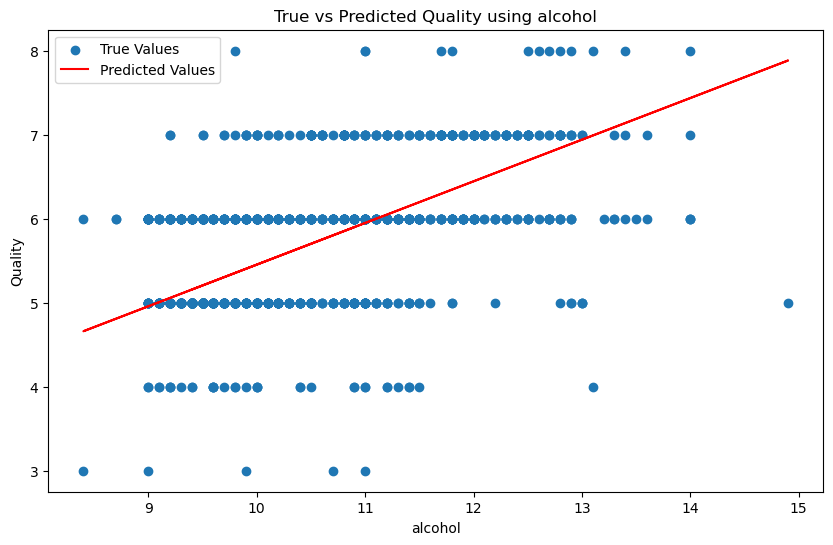

In [ ]:
# Hàm sử dụng 1 đặc trưng tốt nhất để dự đoán chất lượng rượu
def best_feature() -> None:
    best_mse = float("inf")
    best_feature = None
    best_w = None
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    for i in range(X_train.shape[1]):
        # Sử dụng 1 đặc trưng
        X_train_single = X_train[:, i].reshape(-1, 1)
        X_test_single = X_test[:, i].reshape(-1, 1)
        # Tính hệ số w
        w = linear_regression(X_train_single, y_train)
        # Dự đoán chất lượng rượu
        y_pred = predict(X_test_single, w)
        # Tính lỗi bình phương trung bình
        mse_single = mean_squared_error(y_test, y_pred)
        print(f"--> MSE ({features[i]}): {mse_single}")
        if mse_single < best_mse:
            best_mse = mse_single
            best_feature = i
            best_w = w

    print(f"===> Best Feature: {features[best_feature]}")
    print(f"===> Mean Squared Error (Best Feature): {best_mse}")
    # Vẽ biểu đồ dữ liệu
    plot_data(
        X[:, best_feature],
        y,
        predict(X[:, best_feature].reshape(-1, 1), best_w),
        features[best_feature],
    )


# Hàm vẽ biểu đồ dữ liệu
def plot_data(X_feature, y_true, y_pred, feature_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, y_true, label="True Values")
    plt.plot(X_feature, y_pred, color="red", label="Predicted Values")
    plt.xlabel(feature_name)
    plt.ylabel("Quality")
    plt.title(f"True vs Predicted Quality using {feature_name}")
    plt.legend()
    plt.show()


# Gọi hàm để tìm và minh họa đặc trưng tốt nhất
best_feature()

## 3.5 Xây dựng một mô hình của riêng để cho kết quả tốt nhất

Các bước thực hiện:

- Xây dựng mô hình hồi quy tuyến tính bậc 1: $y = w_0 + w_1x_1$
- Xây dựng mô hình hồi quy tuyến tính bậc 2: $y = w_0 + w_1x_1 + w_2x_1^2$
- Xây dựng mô hình hồi quy tuyến tính bậc 3: $y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1^3$
- Xây dựng mô hình tuyến tính - log: $y = w_0 + w_1\ln(x_1)$
- Xây dựng mô hình log - tuyến tính: $\ln(y) = w_0 + w_1x_1$
- Xây dựng mô hình log - log: $\ln(y) = w_0 + w_1\ln(x_1)$
- Đánh giá mô hình bằng độ đo MSE.
- Chọn ra mô hình tốt nhất.
- Trực quan hóa kết quả.
- In ra các hệ số của mô hình.
- Đánh giá mô hình trên tập kiểm tra.
- So sánh kết quả dự đoán với kết quả thực tế.

### 3.5.1 Mô hình $y = w_0 + w_1x_1 + w_2x_1^2$


In [ ]:
# Function to compute the coefficients of the quadratic regression equation - Model: Y = theta0 + theta1*X + theta2*X^2
def quadratic_regression(X: ArrayLike, y: ArrayLike) -> ArrayLike:
    X = np.hstack((X, X**2))
    X = add_intercept(X)
    XTX_inv = np.linalg.inv(X.T @ X)
    theta = XTX_inv @ X.T @ y
    return theta

### 3.5.2 Mô hình $y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1^3$


In [ ]:
# Function to compute the coefficients of the cubic regression equation - Model: Y = theta0 + theta1*X + theta2*X^2 + theta3*X^3
def cube_regression(X: ArrayLike, y: ArrayLike) -> ArrayLike:
    X = np.hstack((X, X**2, X**3))
    X = add_intercept(X)
    XTX_inv = np.linalg.inv(X.T @ X)
    theta = XTX_inv @ X.T @ y
    return theta

### 3.5.3 Mô hình $y = w_0 + w_1\ln(x_1)$


In [ ]:
# Function to compute the coefficients of the logarithmic regression equation - Model: Y = theta0 + theta1*ln(X)
def linear_log_regression(X: ArrayLike, y: ArrayLike) -> ArrayLike:
    X = np.log(X + 1e-10)
    X = add_intercept(X)
    XTX_inv = np.linalg.inv(X.T @ X)
    theta = XTX_inv @ X.T @ y
    return theta

### 3.5.4 Mô hình $\ln(y) = w_0 + w_1x_1$


In [ ]:
# Function to compute the coefficients of the logarithmic regression equation - Model: lnY = theta0 + theta1*X
def log_linear_regression(X: ArrayLike, y: ArrayLike) -> ArrayLike:
    y = np.log(y + 1e-10)
    X = add_intercept(X)
    XTX_inv = np.linalg.inv(X.T @ X)
    theta = XTX_inv @ X.T @ y
    return theta

### 3.5.5 Mô hình $\ln(y) = w_0 + w_1\ln(x_1)$


In [ ]:
# Function to compute the coefficients of the logarithmic regression equation - Model: lnY = theta0 + theta1*ln(X)
def log_log_regression(X: ArrayLike, y: ArrayLike) -> ArrayLike:
    X = np.log(X + 1e-10)
    y = np.log(y + 1e-10)
    X = add_intercept(X)
    XTX_inv = np.linalg.inv(X.T @ X)
    theta = XTX_inv @ X.T @ y
    return theta

### 3.5.6 Chạy thử nghiệm với các mô hình


Completed XTX
Completed XTX_inv
linear - MSE: 0.399457124715869


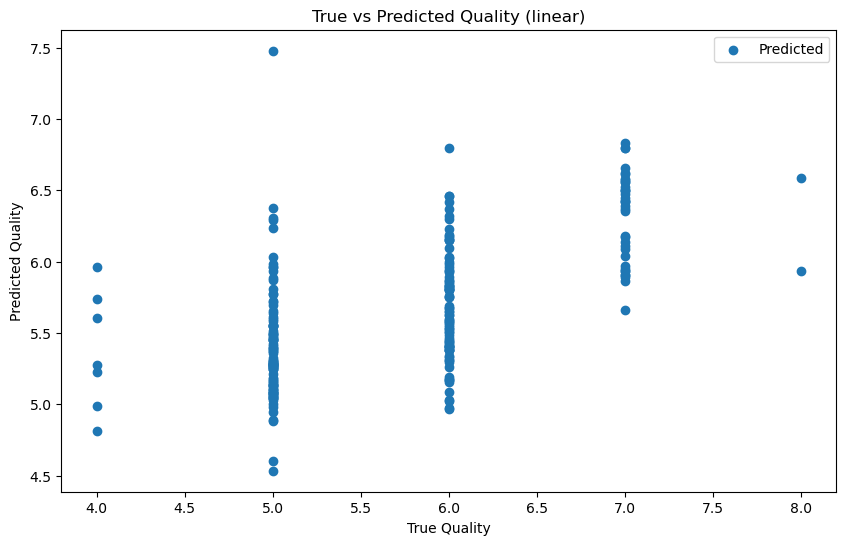

AttributeError: 'list' object has no attribute 'T'

In [ ]:
# Hàm để chạy các mô hình và vẽ đồ thị kết quả
def run_models_and_plot_results(X, y, features):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Các mô hình
    models = {
        "linear": linear_regression,
        "quadratic": quadratic_regression,
        "cubic": cube_regression,
        "linear_log": linear_log_regression,
        "log_linear": log_linear_regression,
        "log_log": log_log_regression,
    }

    # Biến lưu trữ kết quả
    results = {}

    # Huấn luyện và đánh giá từng mô hình
    for model_name, model_func in models.items():
        theta = model_func(X_train, y_train)
        y_pred = predict(X_test, theta, model_name)
        mse = mean_squared_error(y_test, y_pred)
        results[model_name] = (theta, mse)
        print(f"{model_name} - MSE: {mse}")

        # Vẽ biểu đồ kết quả
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, label="Predicted")
        plt.xlabel("True Quality")
        plt.ylabel("Predicted Quality")
        plt.title(f"True vs Predicted Quality ({model_name})")
        plt.legend()
        plt.show()

    return results


# Gọi hàm để chạy các mô hình và vẽ đồ thị kết quả
results = run_models_and_plot_results(X, y, features)

best_model = min(results, key=lambda x: results[x][1])

for model_name, (theta, mse) in results.items():
    print(f"{model_name} - MSE: {mse}")
    print(f"Theta: {theta}")
    print("-" * 70)

print(f"===> Best Model: {best_model} with MSE: {results[best_model][1]}")

# 4. Kết luận

Qua quá trình thực hiện đồ án, chúng ta đã xây dựng mô hình hồi quy tuyến tính để dự đoán chất lượng rượu vang dựa trên 11 đặc trưng. Chúng ta cũng đã thực hiện xây dựng mô hình hồi quy tuyến tính sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất. Cuối cùng, chúng ta cũng đã xây dựng một mô hình riêng để cho kết quả tốt nhất. Kết quả cho thấy mô hình hồi quy tuyến tính sử dụng toàn bộ 11 đặc trưng cho kết quả tốt nhất. Mô hình tuyến tính bậc 2 cho kết quả tốt nhất trong các mô hình được thử nghiệm.

# 5. Tài liệu tham khảo

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
